In [53]:
pip install pandas
pip install scikit-learn

SyntaxError: invalid syntax (1400938848.py, line 1)

In [4]:
# Task 1

## Downloading the CSV File

### import the relevant panda module
import pandas as pd 

### read the csv file
df = pd.read_csv('assignment2wine.csv')

### printing the first few rows to check correctly installed
print(df.head())

   acidity  residualSugar  density    pH  alcohol
0      7.0           20.7   1.0010  3.00      8.8
1      6.3            1.6   0.9940  3.30      9.5
2      8.1            6.9   0.9951  3.26     10.1
3      7.2            8.5   0.9956  3.19      9.9
4      7.2            8.5   0.9956  3.19      9.9


In [54]:
# Task 1a : splitting the data into a test and train set

## Import the relevant functions from numpy and sklearn
import numpy as np
from sklearn.model_selection import train_test_split

## Set the data frame into x and y data
X = df[['acidity', 'residualSugar', 'density', 'pH']]
y = df['alcohol']

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Checking the split has worked
print("Training features:\n", X_train)
print("Test features:\n", X_test)
print("Training labels:\n", y_train)
print("Test labels:\n", y_test)



Training features:
       acidity  residualSugar  density    pH
2322      6.1            1.3  0.99228  3.24
2291      8.6            2.7  0.99365  3.10
3379      7.6           11.3  0.99840  3.01
4355      6.4            2.5  0.98946  3.22
3598      5.8            1.4  0.99043  3.59
...       ...            ...      ...   ...
3457      6.1            1.3  0.99120  3.41
1768      6.6            1.4  0.99220  3.17
1737      6.9            9.6  0.99780  3.39
3240      6.4            1.0  0.99080  3.18
4737      6.1            9.0  0.99234  3.25

[3918 rows x 4 columns]
Test features:
       acidity  residualSugar  density    pH
3943      6.4           6.60  0.99408  2.99
541       7.2          10.40  0.99760  3.16
2824      7.2           6.30  0.99573  3.18
2155      7.8           8.75  0.99620  3.11
4434      7.2           1.70  0.99196  3.25
...       ...            ...      ...   ...
780       6.0           1.40  0.99135  3.37
1630      6.9           1.80  0.99300  3.23
4269      7.1  

In [55]:
# Task 1b : implementing the Widrow-Hoff-Algorithm

# In batch mode:

def widrow_hoff(X, y, mu, epochs):

    """
    Parameters:
    X: Input featyres of matrix (shape n_samples x n_features)
    y: Desired output vector (shape: n_samples)
    mu: Learning rate
    epochs: Number of iterations

    Returns:
    w: Final weight vector
    """

    # Initialise weights
    n_features = X.shape[1]
    w = np.zeros(n_features)

    # Initialise list to store loss values
    loss_values = []

    # put a for loop to limit the number of iterations
    for _ in range(epochs):
    
        # loop through each sample in the dataset
        for i in range(len(y)): 
            x = X.iloc[i]
            
            # calculate predicted output
            predicted_label = np.dot(w,x)
         
            # observe actual label
            actual_label = y.iloc[i]

            # calculate error
            error = actual_label - predicted_label
                        
            # calculate, add to an array and print loss
            loss = (predicted_label - actual_label)**2
            loss_values.append(loss)
            # print(f"Loss for sample{i}: {loss}")
            
            # update weight vector
            w += -1*mu*(predicted_label - actual_label)*x
        
    return w, loss_values

#For stochastic gradient descent 

def widrow_hoff_sgd(X, y, mu, epochs):
    """
    Widrow-Hoff (LMS) Algorithm with Stochastic Gradient Descent and squared loss.
    
    Parameters:
    X: Input feature matrix (shape: n_samples x n_features)
    y: Desired output vector (shape: n_samples)
    mu: Learning rate
    epochs: Number of iterations
    
    Returns:
    w: Final weight vector
    """
    # Initialize weights to zero for each feature
    n_features = X.shape[1]
    w = np.zeros(n_features)

    # Iterate over the specified number of epochs
    for _ in range(epochs):
        # Loop through each sample in the dataset (randomly shuffling for better SGD performance)
        for i in np.random.permutation(len(d)):
            # Calculate predicted output
            y = np.dot(w, X[i])
            
            # Calculate the error (desired output - predicted output)
            e = d[i] - y
            
            # Update the weights based on the error
            w += mu * e * X[i]  # Weight update

            # Optionally, you could calculate and log the loss for monitoring
            loss = e ** 2  # (y - d_i)^2
            
    return w

""" Example usage
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # Input features
y = np.array([1, 2, 2, 3])                       # Desired output
mu = 0.1                                        # Learning rate
epochs = 100                                     # Number of iterations

"""

#final_weights = widrow_hoff_sgd(X, y, mu, epochs)
#print("Final weights:", final_weights)


' Example usage\nX = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # Input features\ny = np.array([1, 2, 2, 3])                       # Desired output\nmu = 0.1                                        # Learning rate\nepochs = 100                                     # Number of iterations\n\n'

In [57]:
# Task 1c:
    # Apply the algorithm
    # Graphically represent the loss function
    # Explore how normalising the data changes the contour plot

# Part One: Apply the Algorithm

#select the attributes that I want to use to train
X = X_train[['residualSugar', 'density']]
y = y_train

#set other variables
mu = 0.01
epochs = 1

#run Widrow-Hoff algorithm
final_weights, loss_values = widrow_hoff(X, y, mu, epochs)
print('Final weights:', final_weights)

Final weights: residualSugar     0.038959
density          11.556758
Name: 2322, dtype: float64


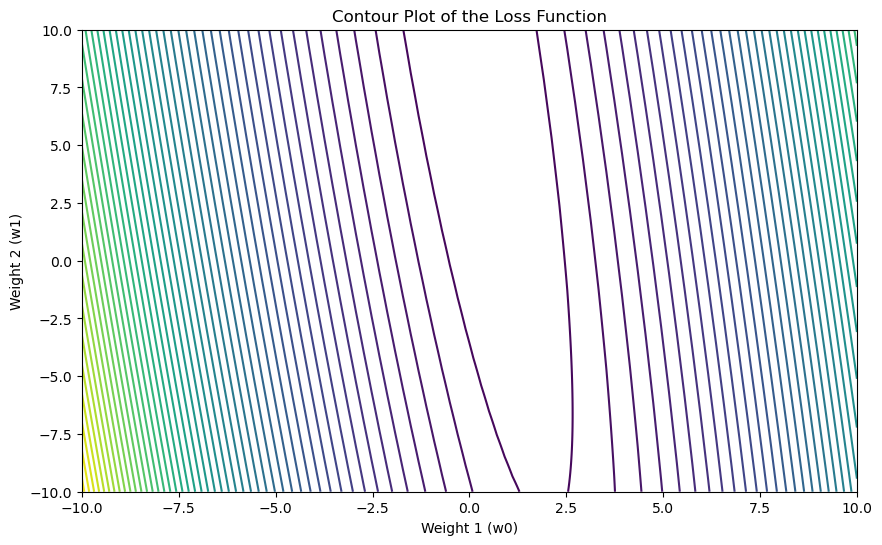

In [58]:
# Part Two: Graphically represent the loss function
""" am going to edit the previous functions so that instead of printing the
 loss it will save it in an array and then i will add the code below to turn 
 that into a graph """
""" I didn't really understand how this works // if I did it right """

#import the matplot library
import matplotlib.pyplot as plt


def loss_function(w):
    """Calculates the mean squared error for given weights."""
    predictions = np.dot(X, w)
    return np.mean((y - predictions) ** 2)

# Generate a grid of weight values
w0 = np.linspace(-10, 10, 100)  # Weight 1
w1 = np.linspace(-10, 10, 100)  # Weight 2
W0, W1 = np.meshgrid(w0, w1)   # Create a grid

# Compute the loss for each combination of weights
loss_values = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w = np.array([W0[i, j], W1[i, j]])
        loss_values[i, j] = loss_function(w)

# Plotting
plt.figure(figsize=(10, 6))
plt.contour(W0, W1, loss_values, levels=50, cmap='viridis')
# plt.colorbar(contour)
plt.title('Contour Plot of the Loss Function')
plt.xlabel('Weight 1 (w0)')
plt.ylabel('Weight 2 (w1)')
plt.show()

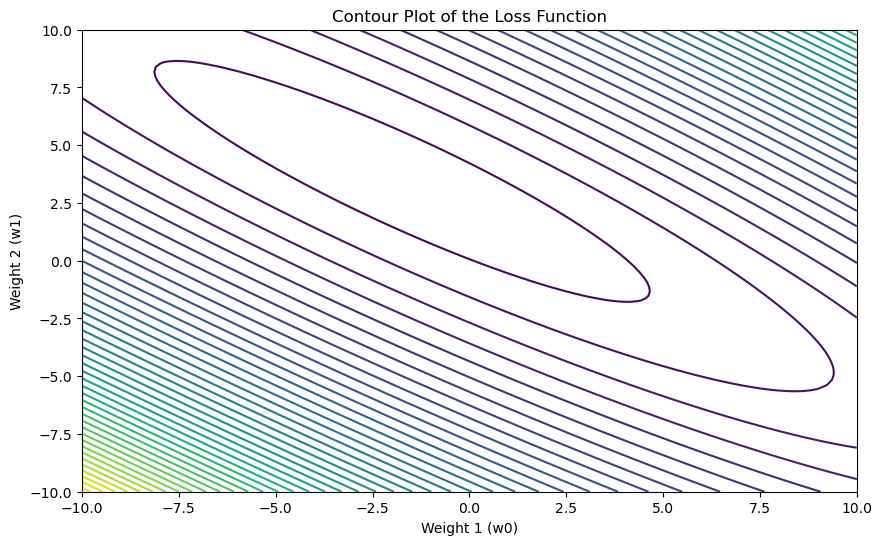

In [52]:
# Normalise the data, how does it change the loss function?

## Noralising the data in the pandas DataFrame
df_norm = (df-df.min())/ (df.max() - df.min())

## Set the data frame into x and y data
X_norm = df_norm[['acidity', 'residualSugar', 'density', 'pH']]
y_norm = df_norm['alcohol']

## Split the data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=99)

X_norm = X_train_norm [['residualSugar', 'density']]
y_norm = y_train_norm

def loss_function(w):
    """Calculates the mean squared error for given weights."""
    predictions = np.dot(X_norm, w)
    return np.mean((y_norm - predictions) ** 2)

# Generate a grid of weight values
w0 = np.linspace(-10, 10, 100)  # Weight 1
w1 = np.linspace(-10, 10, 100)  # Weight 2
W0, W1 = np.meshgrid(w0, w1)   # Create a grid

# Compute the loss for each combination of weights
loss_values = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w = np.array([W0[i, j], W1[i, j]])
        loss_values[i, j] = loss_function(w)

# Plotting
plt.figure(figsize=(10, 6))
plt.contour(W0, W1, loss_values, levels=50, cmap='viridis')
# plt.colorbar(contour)
plt.title('Contour Plot of the Loss Function')
plt.xlabel('Weight 1 (w0)')
plt.ylabel('Weight 2 (w1)')
plt.show()



In [72]:
# Task 1d: Train the model on the train set and predict on the test set

""" We are looking to test to predict residualSugar. 
1. First we should seperate residualSuagr from the other variables
2. Then run the Widrow-Hoff algorithm
3. Then use these weights to predict the values for the test set
"""

# 1. Seperate residualSugar

#set the collumns
X = df[['acidity', 'alcohol', 'density', 'pH']]
y = df['residualSugar']

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#set variables for algorithm
X = X_train
y = y_train
mu = 0.01
epochs = 1

# 2. Run Widrow-Hoff algorithm
final_weights, loss_values = widrow_hoff(X, y, mu, epochs)
print('Final weights:', final_weights)

# 3. Use these weights to predict the other values 
predicted_y_list = []

# create list to hold predicted y values

for i in range(len(X_test)):
    x = X.iloc[i]
    predicted_y = np.dot(final_weights, x)
    predicted_y_list.append(predicted_y)

Final weights: acidity    1.457476
alcohol    0.159256
density    3.281127
pH         4.528060
Name: 2322, dtype: float64


In [71]:
# What is the mean squared error for your predictions?

# import function
from sklearn.metrics import mean_squared_error

y_true = y_test
y_pred =  predicted_y_list

mean_squared_error(y_true, y_pred)

558.519488494857